[**Demo %s**](#demo-euler-converge)

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. We need to define the function for the right-hand side of the ODE, the interval for the independent variable, and the initial value.

In [42]:
ivp = ode;
ivp.ODEFcn = @(t, u, p) sin((t + u)^2);
ivp.InitialValue = -1;
a = 0;  b = 4;

Here is the call to {numref}`Function {number} <function-euler>`.

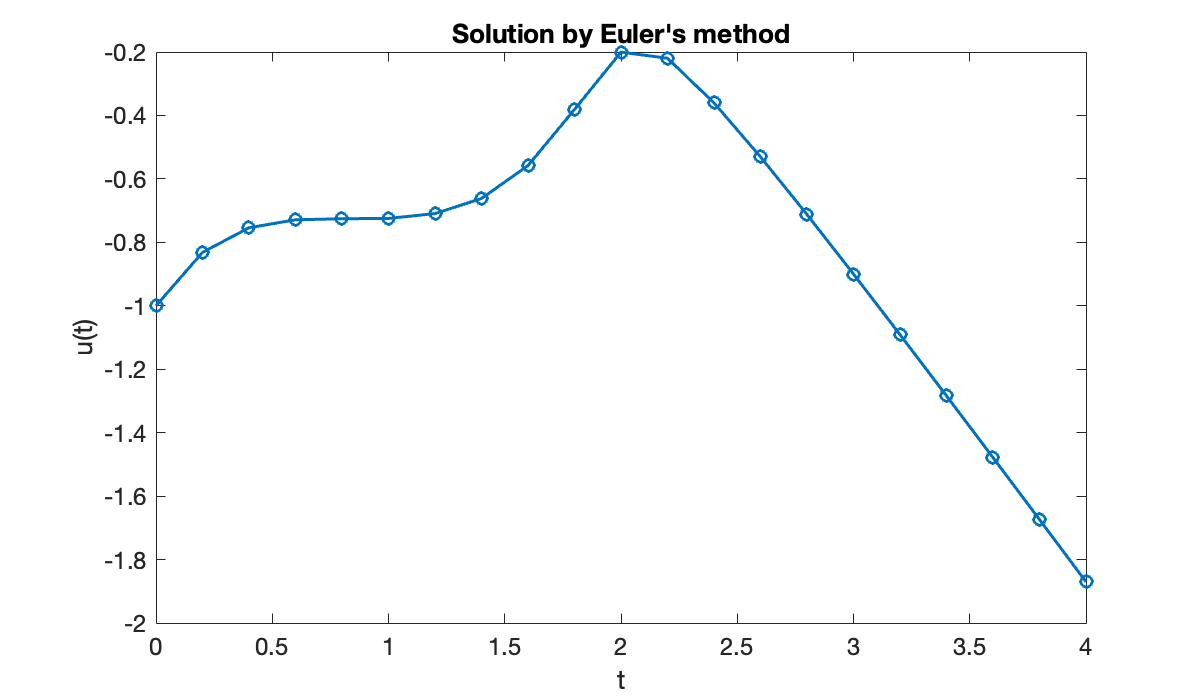

In [48]:
[t, u] = eulerivp(ivp, a, b, 20);
clf, plot(t, u, 'o-')
xlabel('t')
ylabel('u(t)')
title(('Solution by Euler''s method'));

We could define a different interpolant to get a smoother picture above, but the derivation of Euler's method assumed a piecewise linear interpolant. We can instead request more steps to make the interpolant look smoother.

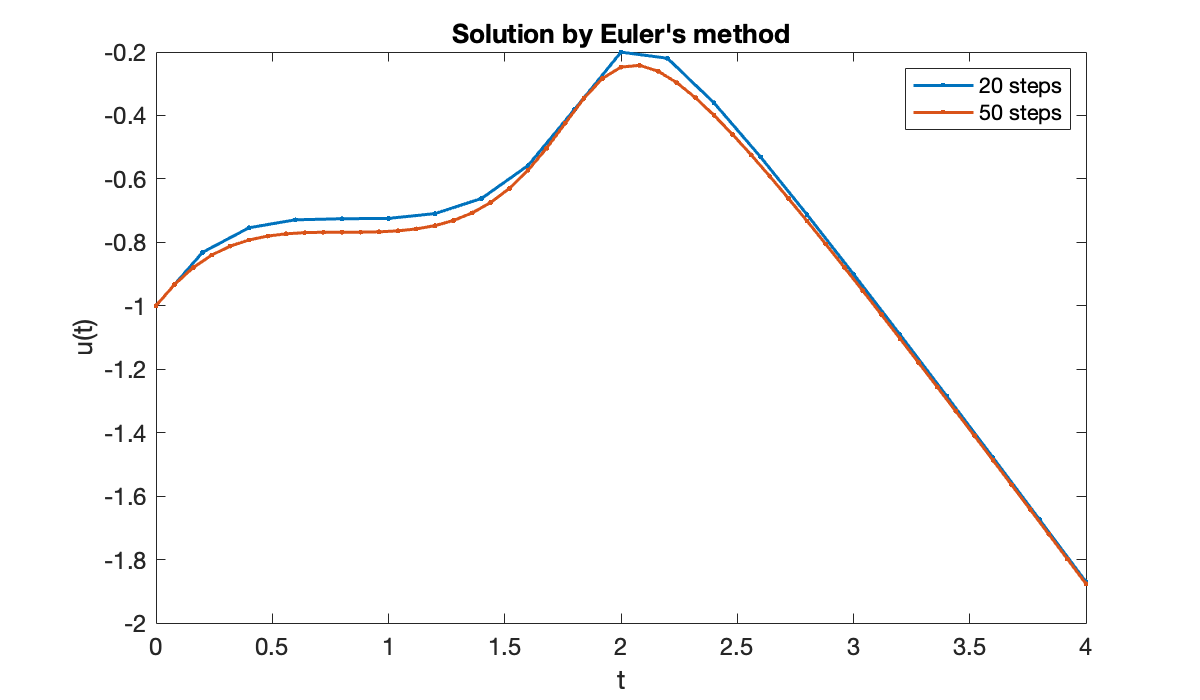

In [44]:
[t, u] = eulerivp(ivp, a, b, 50);
hold on, plot(t, u, '.-')
legend('20 steps', '50 steps');

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should anticipate the same behavior from Euler's method. We don't have an exact solution to compare to, so we will use a built-in solver to construct an accurate reference solution.

In [45]:
ivp.AbsoluteTolerance = 1e-13;
ivp.RelativeTolerance = 1e-13;
u_exact = solutionFcn(ivp, a, b);

Now we can perform a convergence study.

In [46]:
n = round(5 * 10.^(0:0.5:3));
err = [];
for k = 1:length(n)
    [t, u] = eulerivp(ivp, a, b, n(k));
    err(k) = norm(u_exact(t) - u, Inf);
end
table(n', err', VariableNames=["n", "inf-norm error"])

n,inf-norm error
5,2.7342
16,0.1076
50,0.0300
158,0.0089
500,0.0027
1581,8.5965e-04
5000,2.7124e-04


The error is approximately cut by a factor of 10 for each increase in $n$ by the same factor. A log-log plot also confirms first-order convergence. Keep in mind that since $h=(b-a)/n$, it follows that $O(h)=O(n^{-1})$.

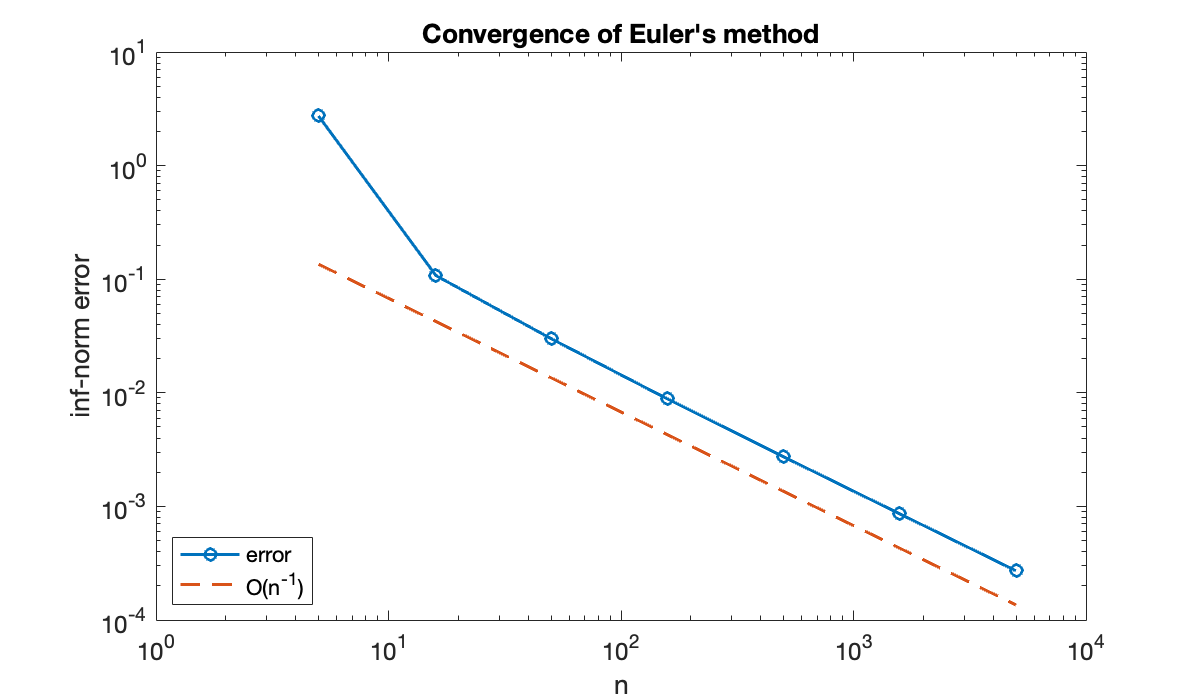

In [47]:
clf
loglog(n, err, 'o-')
hold on, loglog(n, 0.5 * err(end) * (n / n(end)).^(-1), '--')
xlabel('n')
ylabel('inf-norm error')
title('Convergence of Euler''s method')
legend('error', 'O(n^{-1})', 'location', 'southwest');